## Assignment 5 - More work with the King County Housing Data

3. Create Markdown cells and answer the following question in your notebook:
    * What are the 3 most promising columns that correlate well with price (high positive or negative correlation)?
4. Save your file as Studentname-L05-KingCountyHousing.html, replacing Studentname with your own.
5. Also download your file as a Jupyter notebook for use later.
6. Submit your assignment

In [12]:
library(stringr)    # stringr
library(tidyverse)
library(repr)

# Reduce the plot size
options(repr.plot.width=4, repr.plot.height=4)


In [8]:
# Correctly write statements to import the data.
kc_data <- read_csv("kc_house_data.csv")

Parsed with column specification:
cols(
  .default = col_integer(),
  id = col_character(),
  date = col_datetime(format = ""),
  price = col_double(),
  bathrooms = col_double(),
  floors = col_double(),
  lat = col_double(),
  long = col_double()
)
See spec(...) for full column specifications.


In [9]:
# Show a preview of the data, including the number of Observations and Variables
glimpse(kc_data)

Observations: 21,613
Variables: 21
$ id            <chr> "7129300520", "6414100192", "5631500400", "2487200875...
$ date          <dttm> 2014-10-13, 2014-12-09, 2015-02-25, 2014-12-09, 2015...
$ price         <dbl> 221900, 538000, 180000, 604000, 510000, 1225000, 2575...
$ bedrooms      <int> 3, 3, 2, 4, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 5, 4, 3, 4,...
$ bathrooms     <dbl> 1.00, 2.25, 1.00, 3.00, 2.00, 4.50, 2.25, 1.50, 1.00,...
$ sqft_living   <int> 1180, 2570, 770, 1960, 1680, 5420, 1715, 1060, 1780, ...
$ sqft_lot      <int> 5650, 7242, 10000, 5000, 8080, 101930, 6819, 9711, 74...
$ floors        <dbl> 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0...
$ waterfront    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ view          <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,...
$ condition     <int> 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 4,...
$ grade         <int> 7, 7, 6, 7, 8, 11, 7, 7, 7, 7, 8, 7, 7, 7, 7, 9, 7, 7...
$ sqft_above    <

In [10]:
# Create a user defined function named gg_scatter() 
# that accepts a data frame and an x an y column names 
# and creates a scatter plot 
# (think about including jitter, alpha, and a trendline)

gg_scatter <- function(data, x_col, y_col) {
    plt <- data %>% ggplot(mapping = aes_string(x = x_col, y = y_col)) + 
       geom_jitter(alpha = 0.5) + 
       geom_smooth(method = "lm", se = FALSE) +
       ggtitle(str_c(y_col, " vs. ", x_col), 
              subtitle = str_c("Row count:", data %>% nrow()))
    print(plt)
}

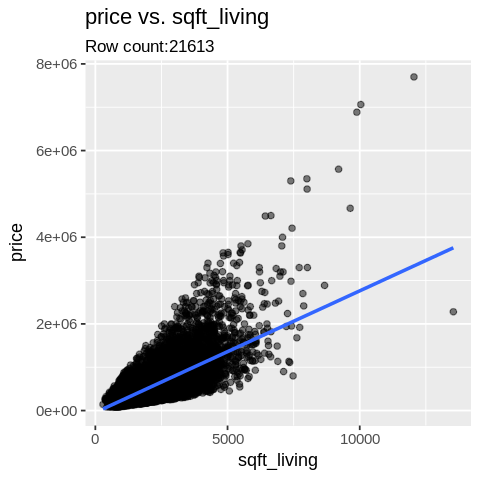

In [13]:
# Test that it works
gg_scatter(data = kc_data, x_col = "sqft_living", y_col = "price")

In [15]:
# Create a user defined function named *save_plot()* 
# to save ggplots to a .png file on disk.

save_plot <- function(filename) {
    filename %>% ggsave()
}

In [16]:
# Test that it works
save_plot("foo_bar.png")

Saving 6.67 x 6.67 in image


In [24]:
# Incorporate *save_plot* into *gg_scatter*
gg_scatter <- function(data, x_col, y_col) { 
        plt <- data %>% ggplot(mapping = aes_string(x = x_col, y = y_col)) + 
        geom_jitter(alpha = 0.5) + 
        geom_smooth(method = "lm", se = FALSE) +
        ggtitle(str_c(y_col, " vs. ", x_col))
        print(plt)
        str_c(x_col, "_vs_", y_col, ".png") %>% save_plot()
        }

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


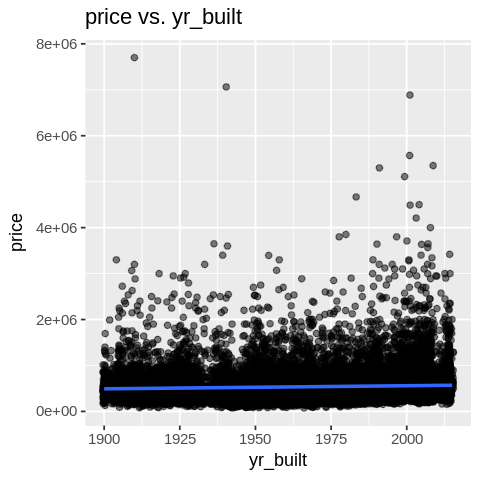

Saving 6.67 x 6.67 in image


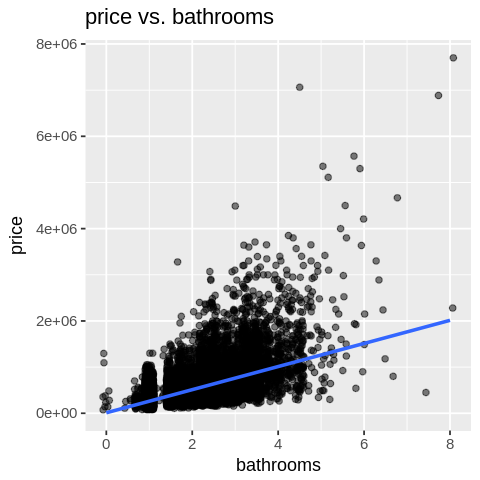

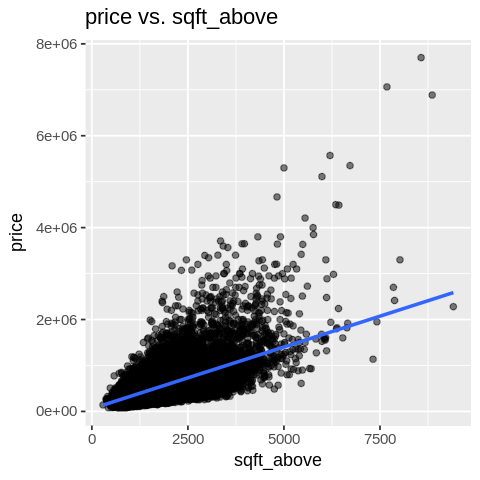

In [25]:
# Call gg_scatter with y = price and x = 3 different columns
# yr_built
# bathrooms
# sqft_above

kc_data %>% gg_scatter("yr_built", "price")
kc_data %>% gg_scatter("bathrooms", "price")
kc_data %>% gg_scatter("sqft_above", "price")

In [40]:
# * Write single line of code that calls gg_scatter() plotting all numeric variables against price. Hint: walk()

# Need to figure out how to determine if field is numeric...

for(name in names(kc_data)) {
    if(kc_data[name] %>% sapply(is.numeric)) {
        print(name)
        }
    }


[1] "price"
[1] "bedrooms"
[1] "bathrooms"
[1] "sqft_living"
[1] "sqft_lot"
[1] "floors"
[1] "waterfront"
[1] "view"
[1] "condition"
[1] "grade"
[1] "sqft_above"
[1] "sqft_basement"
[1] "yr_built"
[1] "yr_renovated"
[1] "zipcode"
[1] "lat"
[1] "long"
[1] "sqft_living15"
[1] "sqft_lot15"


 [1] "id"            "date"          "bedrooms"      "bathrooms"    
 [5] "sqft_living"   "sqft_lot"      "floors"        "waterfront"   
 [9] "view"          "condition"     "grade"         "sqft_above"   
[13] "sqft_basement" "yr_built"      "yr_renovated"  "zipcode"      
[17] "lat"           "long"          "sqft_living15" "sqft_lot15"   


Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


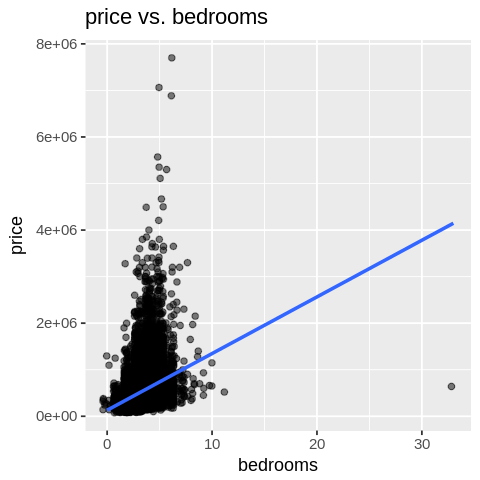

Saving 6.67 x 6.67 in image


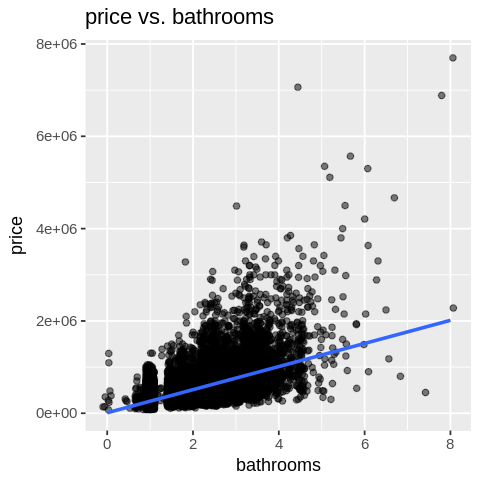

Saving 6.67 x 6.67 in image


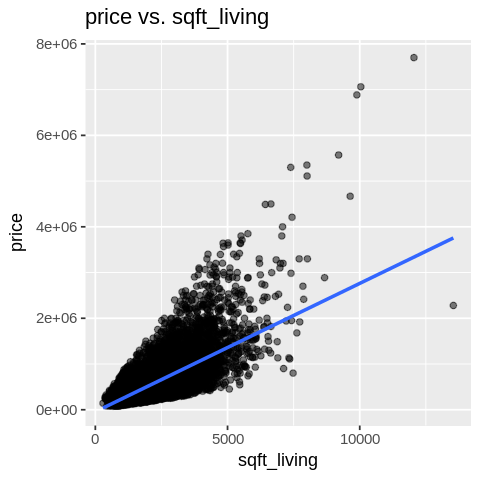

Saving 6.67 x 6.67 in image


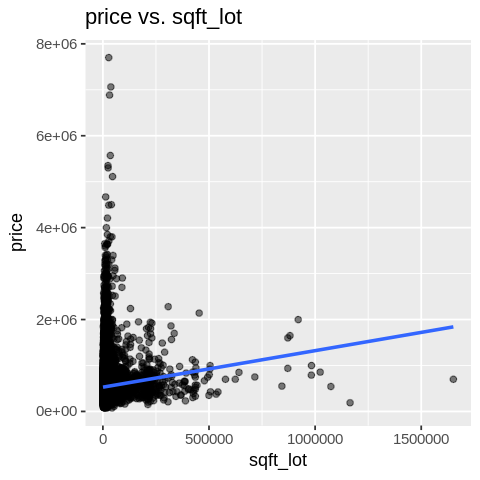

Saving 6.67 x 6.67 in image


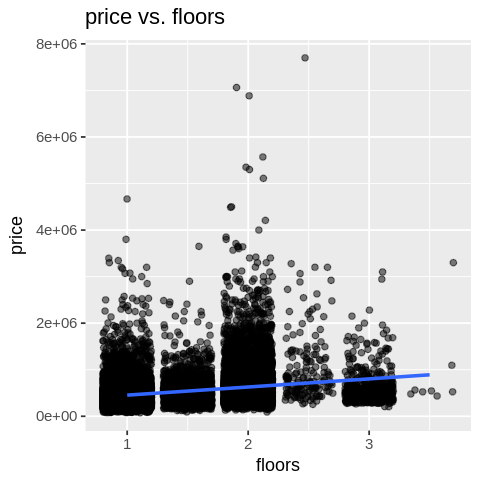

Saving 6.67 x 6.67 in image


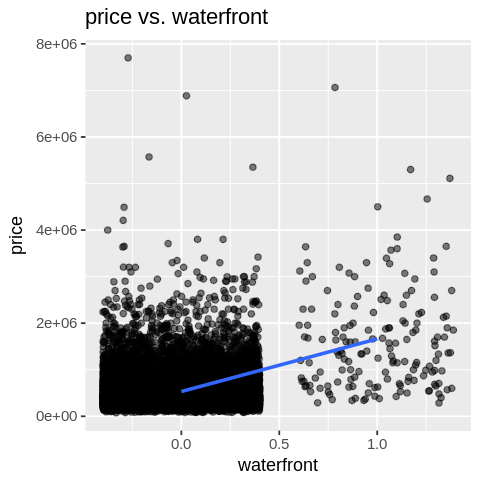

Saving 6.67 x 6.67 in image


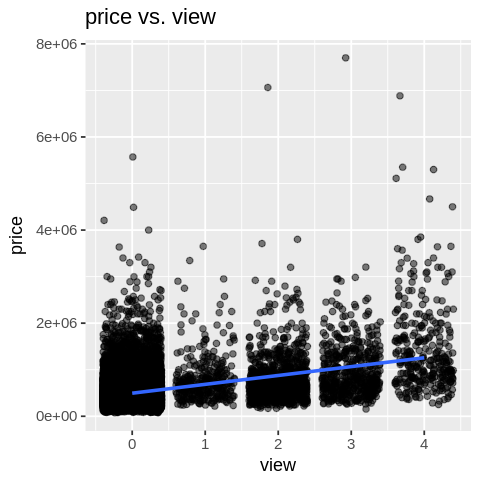

Saving 6.67 x 6.67 in image


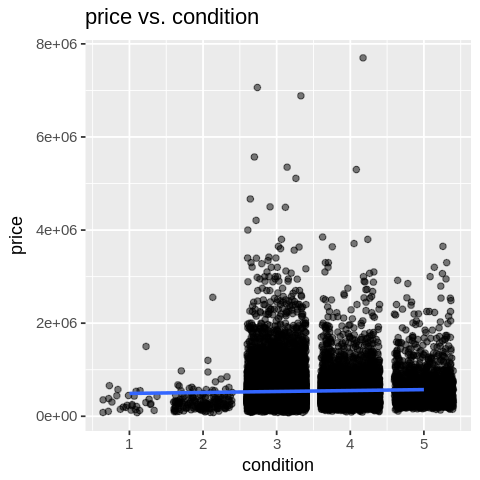

Saving 6.67 x 6.67 in image


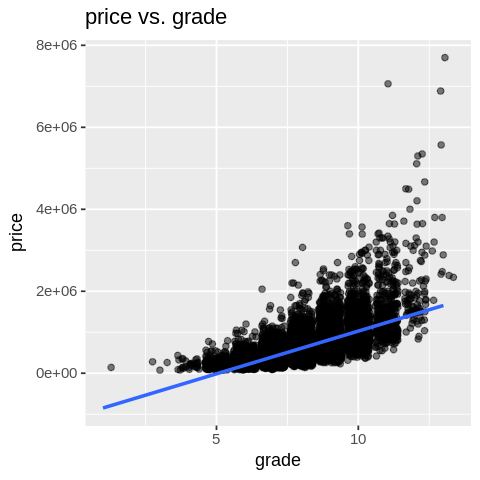

Saving 6.67 x 6.67 in image


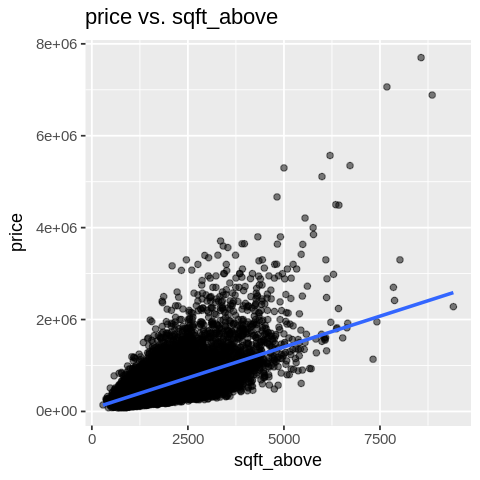

Saving 6.67 x 6.67 in image


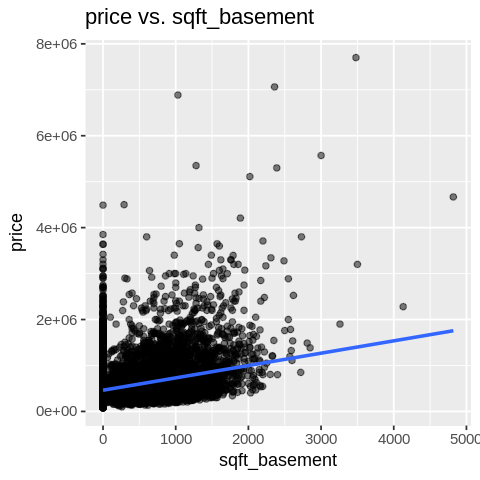

Saving 6.67 x 6.67 in image


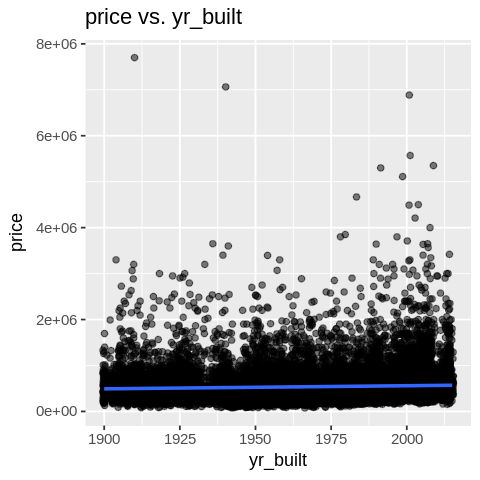

Saving 6.67 x 6.67 in image


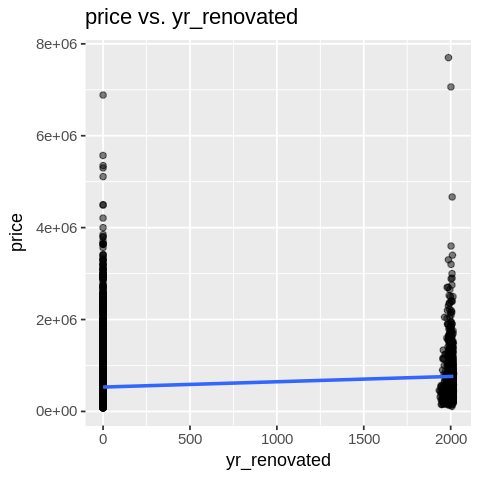

Saving 6.67 x 6.67 in image


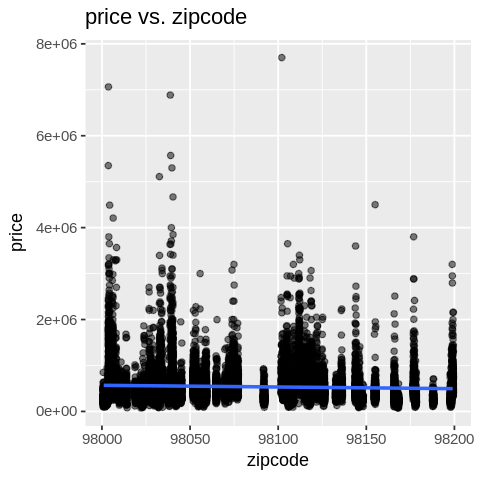

Saving 6.67 x 6.67 in image


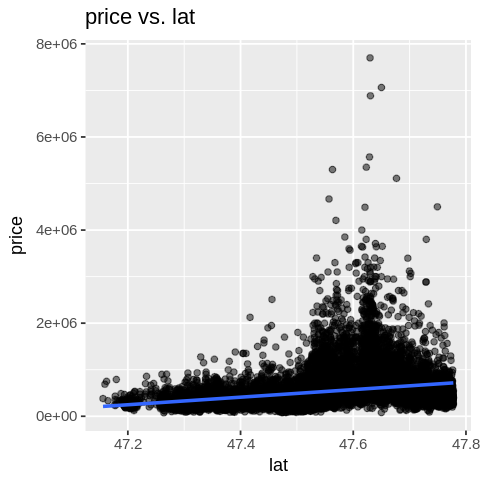

Saving 6.67 x 6.67 in image


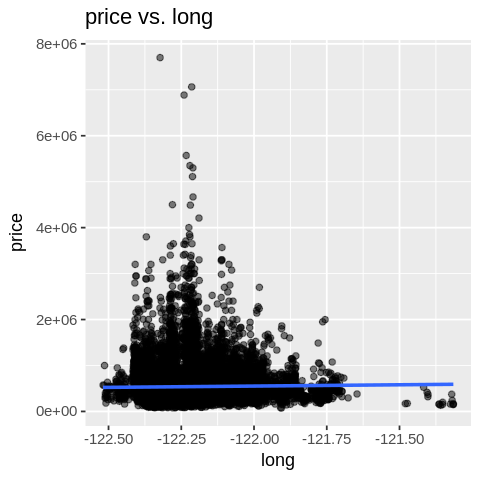

Saving 6.67 x 6.67 in image


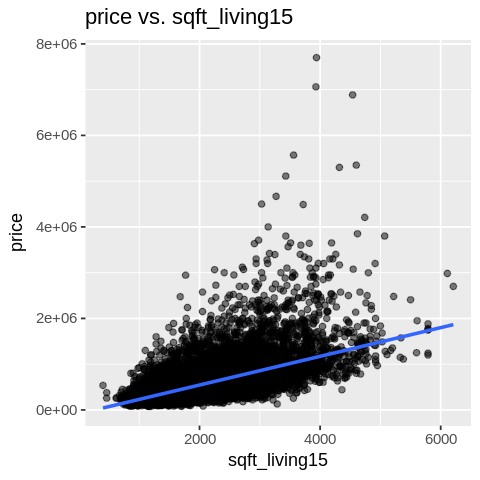

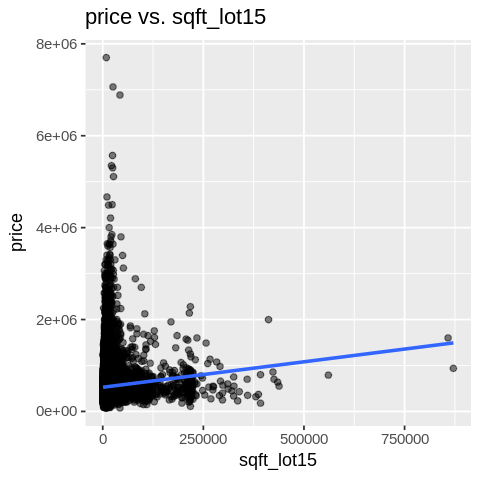

In [57]:
# * Write single line of code that calls gg_scatter() plotting all numeric variables against price. Hint: walk()
gg_scatter <- function(data, x_col, y_col) { 
        plt <- data %>% ggplot(mapping = aes_string(x = x_col, y = y_col)) + 
        geom_jitter(alpha = 0.5) + 
        geom_smooth(method = "lm", se = FALSE) +
        ggtitle(str_c(y_col, " vs. ", x_col))
        if(sapply(data[x_col], is.numeric)) { # <--- check if numeric here
            print(plt)
            str_c(x_col, "_vs_", y_col, ".png") %>% save_plot()
            }
        }

y_col <- "price"
x_cols <- names(select(kc_data, -price))

print(x_cols)

x_cols %>% walk(gg_scatter, data = kc_data, y_col = y_col)
# aka
#walk(x_cols, gg_scatter, data = kc_data, y_col)